# Data Loading 
# Load the dataset from a CSV file 

In [2]:
import pandas as pd
data = pd.read_csv('data.csv')
data.head()

sd_uk  sp_uk    delivery_start_uk      delivery_end_uk  \
0  2023-01-01      1  2023-01-01 00:00:00  2023-01-01 00:30:00   
1  2023-01-01      2  2023-01-01 00:30:00  2023-01-01 01:00:00   
2  2023-01-01      3  2023-01-01 01:00:00  2023-01-01 01:30:00   
3  2023-01-01      4  2023-01-01 01:30:00  2023-01-01 02:00:00   
4  2023-01-01      5  2023-01-01 02:00:00  2023-01-01 02:30:00   

    delivery_start_utc     delivery_end_utc  gb_da_price  irl_da_price  \
0  2023-01-01 00:00:00  2023-01-01 00:30:00         60.0        141.80   
1  2023-01-01 00:30:00  2023-01-01 01:00:00         60.0        141.80   
2  2023-01-01 01:00:00  2023-01-01 01:30:00         49.5        139.48   
3  2023-01-01 01:30:00  2023-01-01 02:00:00         49.5        139.48   
4  2023-01-01 02:00:00  2023-01-01 02:30:00         18.0        130.42   

   scheduled_flow  
0          -944.6  
1          -944.6  
2          -944.6  
3          -944.6  
4          -944.6

# Extract time-based features from the datetime column


In [3]:
data['delivery_start_uk'] = pd.to_datetime(data['delivery_start_uk'])
data['hour'] = data['delivery_start_uk'].dt.hour
data['day_of_week'] = data['delivery_start_uk'].dt.dayofweek
data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)
data['month'] = data['delivery_start_uk'].dt.month

data.head()

sd_uk  sp_uk   delivery_start_uk      delivery_end_uk  \
0  2023-01-01      1 2023-01-01 00:00:00  2023-01-01 00:30:00   
1  2023-01-01      2 2023-01-01 00:30:00  2023-01-01 01:00:00   
2  2023-01-01      3 2023-01-01 01:00:00  2023-01-01 01:30:00   
3  2023-01-01      4 2023-01-01 01:30:00  2023-01-01 02:00:00   
4  2023-01-01      5 2023-01-01 02:00:00  2023-01-01 02:30:00   

    delivery_start_utc     delivery_end_utc  gb_da_price  irl_da_price  \
0  2023-01-01 00:00:00  2023-01-01 00:30:00         60.0        141.80   
1  2023-01-01 00:30:00  2023-01-01 01:00:00         60.0        141.80   
2  2023-01-01 01:00:00  2023-01-01 01:30:00         49.5        139.48   
3  2023-01-01 01:30:00  2023-01-01 02:00:00         49.5        139.48   
4  2023-01-01 02:00:00  2023-01-01 02:30:00         18.0        130.42   

   scheduled_flow  hour  day_of_week  is_weekend  month  
0          -944.6     0            6           1      1  
1          -944.6     0            6           1      1  
2          -944.6     1            6           1      1  
3          -944.6     1            6           1      1  
4          -944.6     2            6           1      1

# Engineer additional features for better prediction


In [4]:
data['price_diff'] = data['gb_da_price'] - data['irl_da_price']
data['price_diff_lag1'] = data['price_diff'].shift(1)
data['price_diff_lag2'] = data['price_diff'].shift(2)
data['flow_lag1'] = data['scheduled_flow'].shift(1)
data['flow_lag3'] = data['scheduled_flow'].shift(3)
data['price_diff_roll_mean_7d'] = data['price_diff'].rolling(window=336).mean()
data['flow_trend_7d'] = data['scheduled_flow'].rolling(window=336).mean()
data['price_diff_hour'] = data['price_diff'] * data['hour']
data.head()

sd_uk  sp_uk   delivery_start_uk      delivery_end_uk  \
0  2023-01-01      1 2023-01-01 00:00:00  2023-01-01 00:30:00   
1  2023-01-01      2 2023-01-01 00:30:00  2023-01-01 01:00:00   
2  2023-01-01      3 2023-01-01 01:00:00  2023-01-01 01:30:00   
3  2023-01-01      4 2023-01-01 01:30:00  2023-01-01 02:00:00   
4  2023-01-01      5 2023-01-01 02:00:00  2023-01-01 02:30:00   

    delivery_start_utc     delivery_end_utc  gb_da_price  irl_da_price  \
0  2023-01-01 00:00:00  2023-01-01 00:30:00         60.0        141.80   
1  2023-01-01 00:30:00  2023-01-01 01:00:00         60.0        141.80   
2  2023-01-01 01:00:00  2023-01-01 01:30:00         49.5        139.48   
3  2023-01-01 01:30:00  2023-01-01 02:00:00         49.5        139.48   
4  2023-01-01 02:00:00  2023-01-01 02:30:00         18.0        130.42   

   scheduled_flow  hour  ...  is_weekend  month  price_diff  price_diff_lag1  \
0          -944.6     0  ...           1      1      -81.80              NaN   
1          -944.6     0  ...           1      1      -81.80           -81.80   
2          -944.6     1  ...           1      1      -89.98           -81.80   
3          -944.6     1  ...           1      1      -89.98           -89.98   
4          -944.6     2  ...           1      1     -112.42           -89.98   

   price_diff_lag2  flow_lag1  flow_lag3  price_diff_roll_mean_7d  \
0              NaN        NaN        NaN                      NaN   
1              NaN     -944.6        NaN                      NaN   
2           -81.80     -944.6        NaN                      NaN   
3           -81.80     -944.6     -944.6                      NaN   
4           -89.98     -944.6     -944.6                      NaN   

   flow_trend_7d  price_diff_hour  
0            NaN            -0.00  
1            NaN            -0.00  
2            NaN           -89.98  
3            NaN           -89.98  
4            NaN          -224.84  

[5 rows x 21 columns]

# Remove rows with missing values after feature engineering


In [5]:
data = data.dropna()
data.head()

sd_uk  sp_uk   delivery_start_uk      delivery_end_uk  \
335  2023-01-07     48 2023-01-07 23:30:00  2023-01-08 00:00:00   
336  2023-01-08      1 2023-01-08 00:00:00  2023-01-08 00:30:00   
337  2023-01-08      2 2023-01-08 00:30:00  2023-01-08 01:00:00   
338  2023-01-08      3 2023-01-08 01:00:00  2023-01-08 01:30:00   
339  2023-01-08      4 2023-01-08 01:30:00  2023-01-08 02:00:00   

      delivery_start_utc     delivery_end_utc  gb_da_price  irl_da_price  \
335  2023-01-07 23:30:00  2023-01-08 00:00:00         22.1         13.20   
336  2023-01-08 00:00:00  2023-01-08 00:30:00         18.1          4.50   
337  2023-01-08 00:30:00  2023-01-08 01:00:00         18.1          4.50   
338  2023-01-08 01:00:00  2023-01-08 01:30:00         14.0          0.88   
339  2023-01-08 01:30:00  2023-01-08 02:00:00         14.0          0.88   

     scheduled_flow  hour  ...  is_weekend  month  price_diff  \
335           202.1    23  ...           1      1        8.90   
336           106.8     0  ...           1      1       13.60   
337           392.6     0  ...           1      1       13.60   
338           321.8     1  ...           1      1       13.12   
339           135.8     1  ...           1      1       13.12   

     price_diff_lag1  price_diff_lag2  flow_lag1  flow_lag3  \
335             8.90            16.47      449.2      646.2   
336             8.90             8.90      202.1      749.2   
337            13.60             8.90      106.8      449.2   
338            13.60            13.60      392.6      202.1   
339            13.12            13.60      321.8      106.8   

     price_diff_roll_mean_7d  flow_trend_7d  price_diff_hour  
335               -14.985893    -143.208036           204.70  
336               -14.701964    -140.078869             0.00  
337               -14.418036    -136.099107             0.00  
338               -14.111190    -132.330060            13.12  
339               -13.804345    -129.114583            13.12  

[5 rows x 21 columns]

#	Relationships between scheduled_flow and key features 

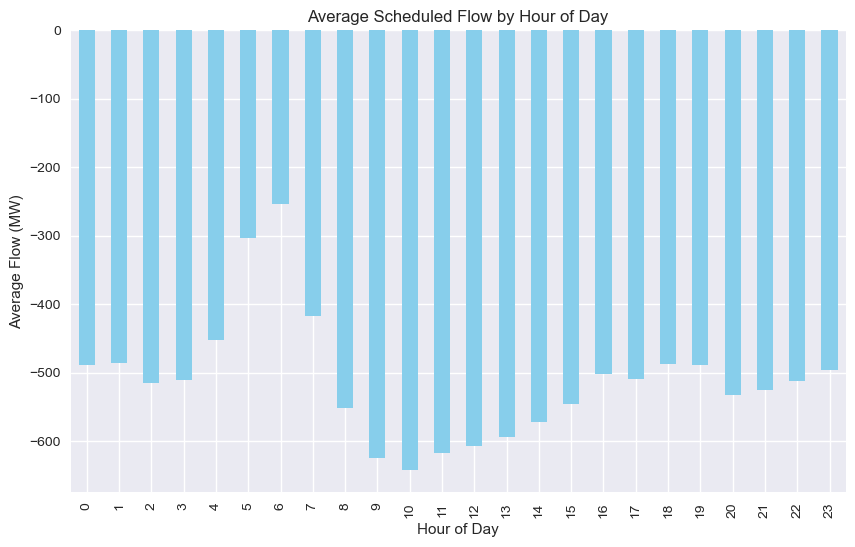

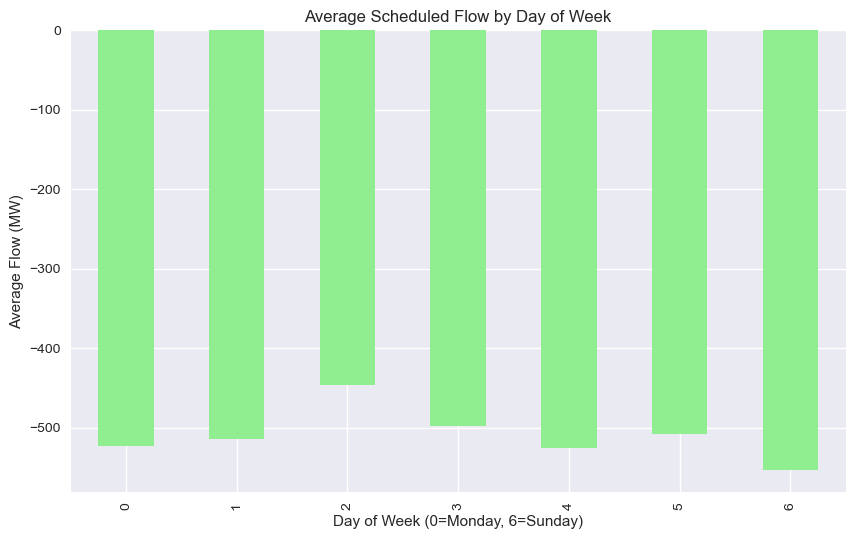

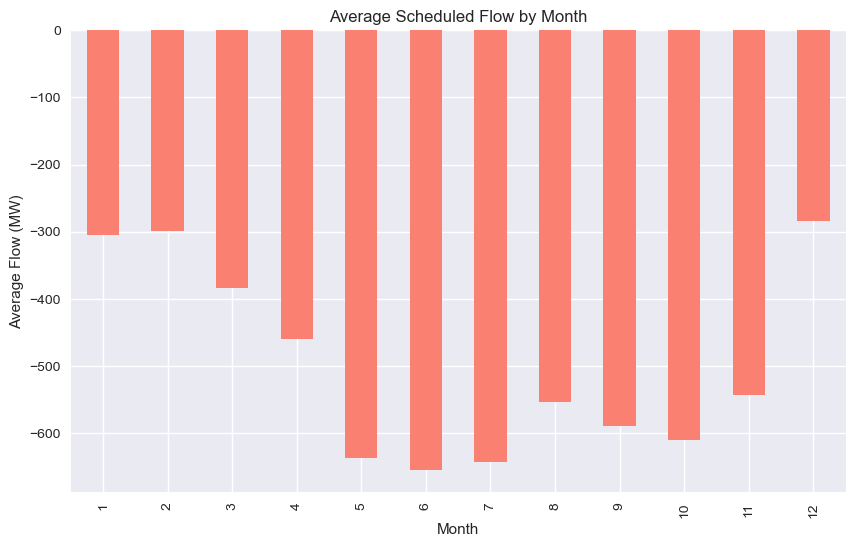

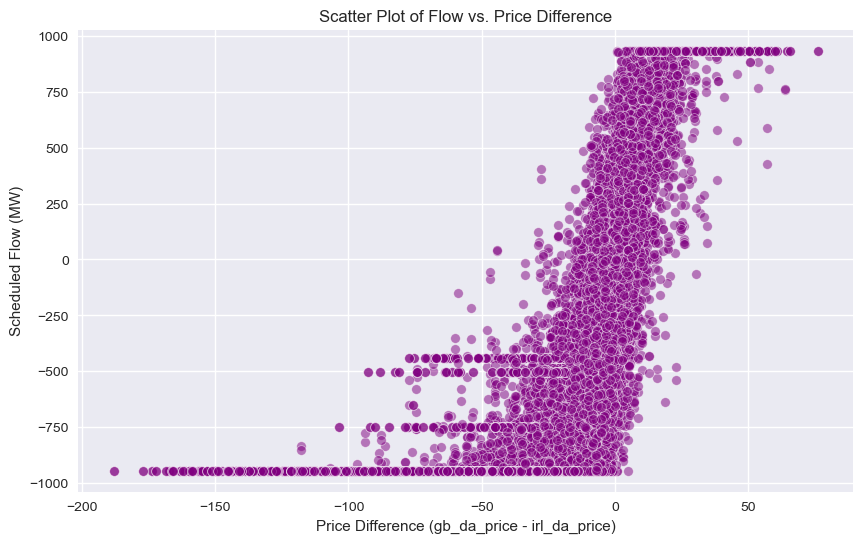

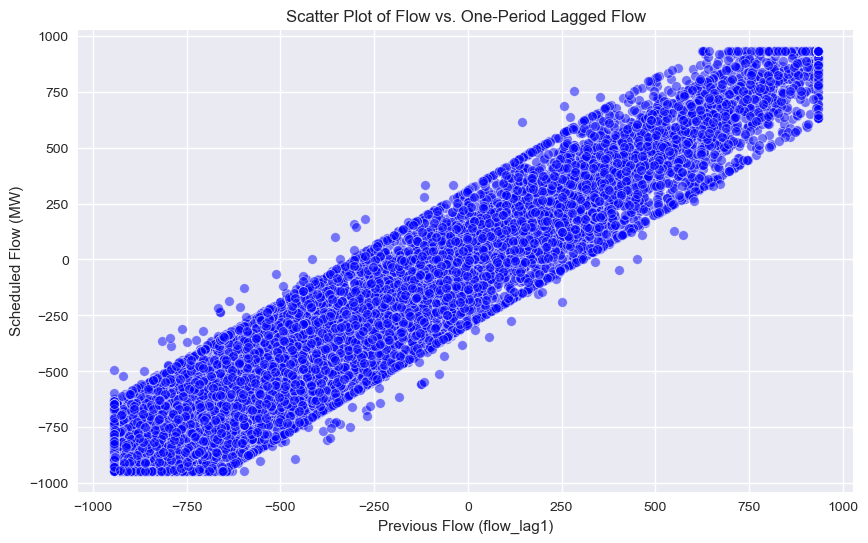

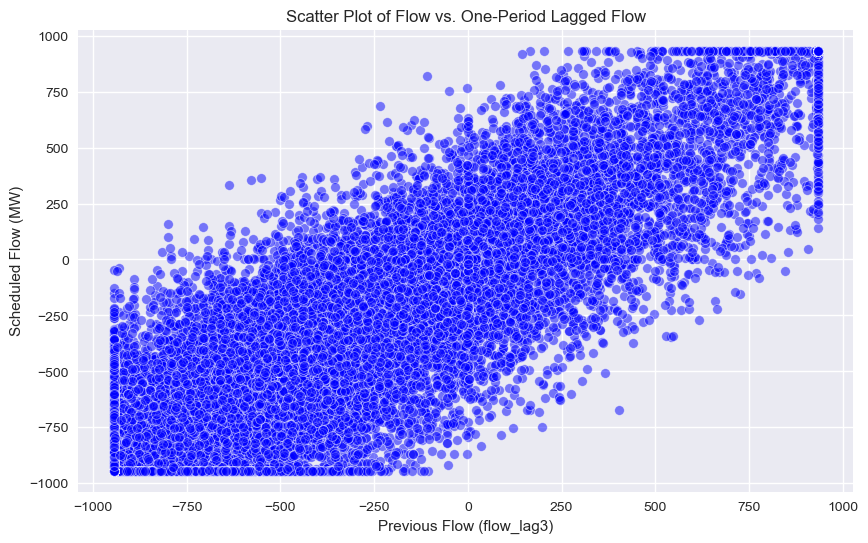

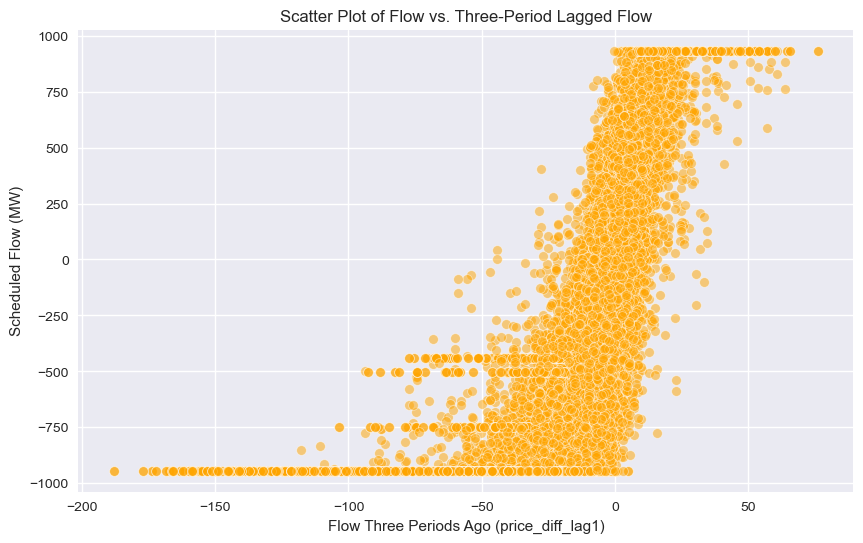

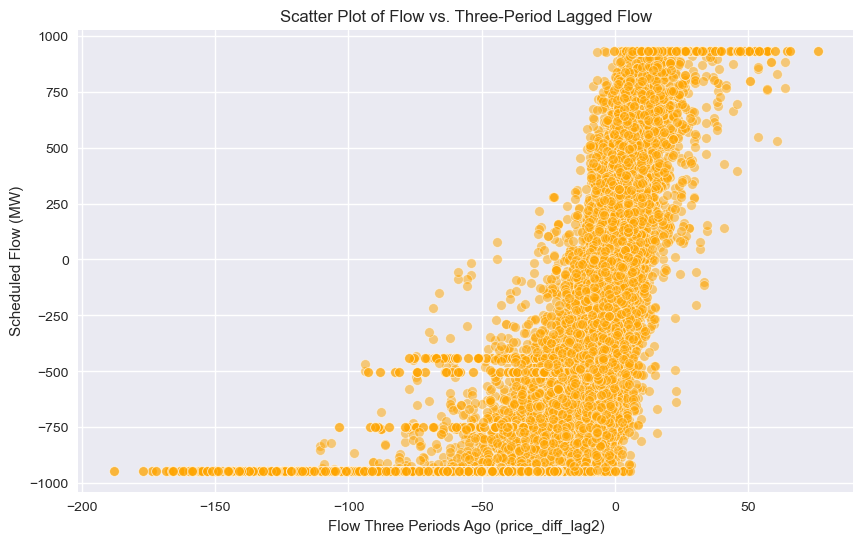

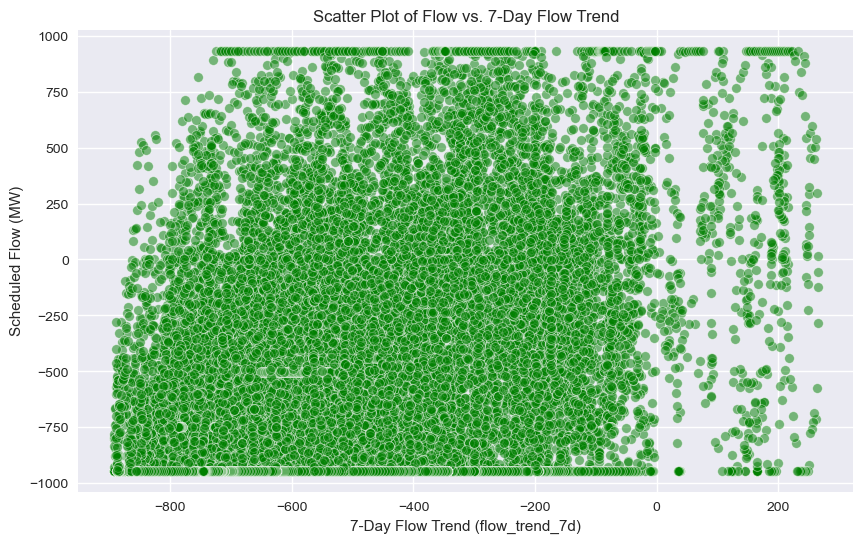

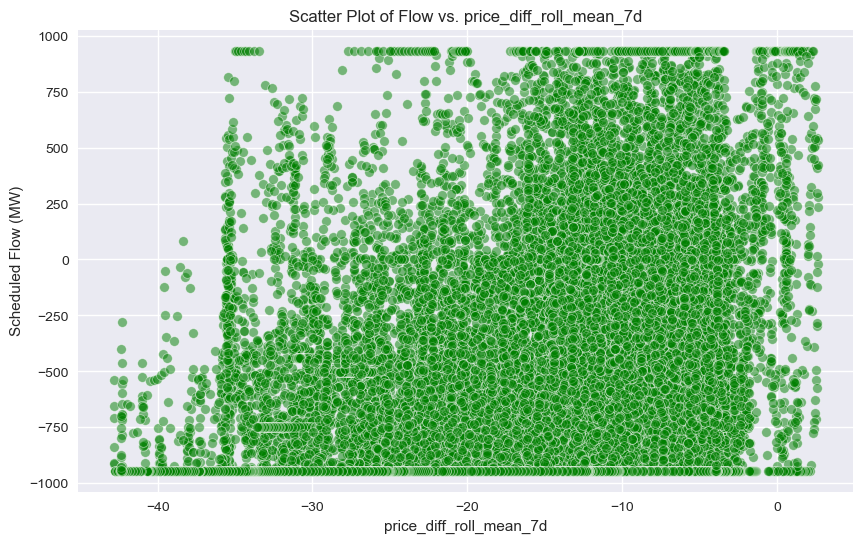

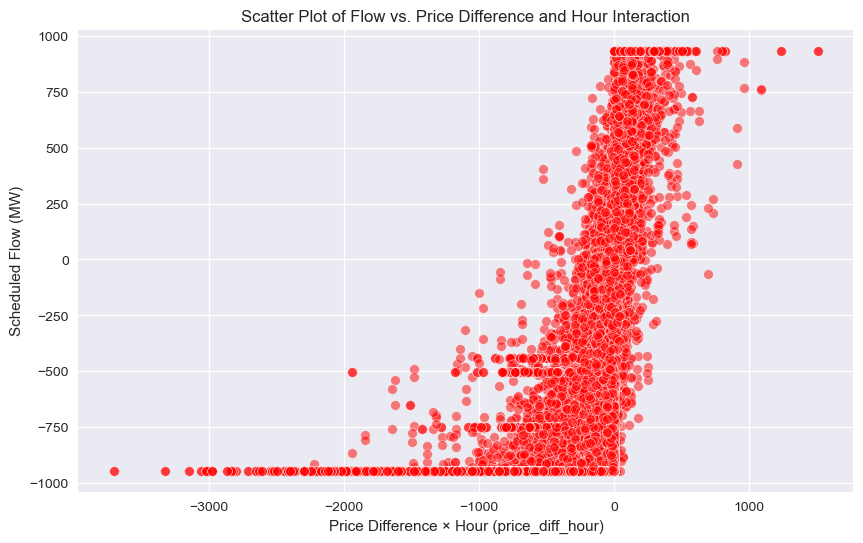

C:\Users\PayaPc.Com\AppData\Local\Temp\ipykernel_46028\1227814135.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_weekend', y='scheduled_flow', data=data, palette='pastel')


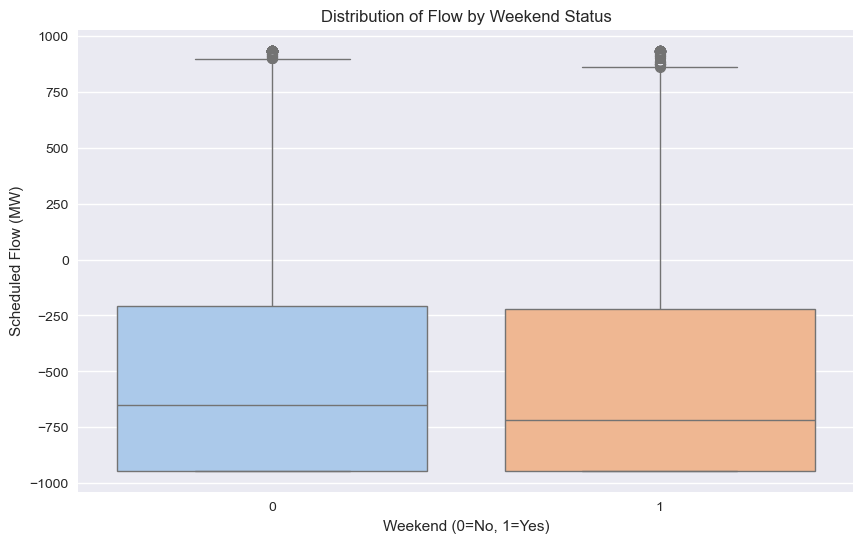

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# General settings for plots
plt.style.use('seaborn-v0_8')  # Use a modern Seaborn style in Matplotlib
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Average scheduled flow by hour of the day
hour_flow = data.groupby('hour')['scheduled_flow'].mean()
plt.figure()
hour_flow.plot(kind='bar', color='skyblue')
plt.title('Average Scheduled Flow by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Flow (MW)')
plt.show()

# 2. Average scheduled flow by day of the week
day_flow = data.groupby('day_of_week')['scheduled_flow'].mean()
plt.figure()
day_flow.plot(kind='bar', color='lightgreen')
plt.title('Average Scheduled Flow by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Flow (MW)')
plt.show()

# 3. Average scheduled flow by month
month_flow = data.groupby('month')['scheduled_flow'].mean()
plt.figure()
month_flow.plot(kind='bar', color='salmon')
plt.title('Average Scheduled Flow by Month')
plt.xlabel('Month')
plt.ylabel('Average Flow (MW)')
plt.show()

# 4. Scatter plot of flow vs. price difference
plt.figure()
sns.scatterplot(x='price_diff', y='scheduled_flow', data=data, alpha=0.5, color='purple')
plt.title('Scatter Plot of Flow vs. Price Difference')
plt.xlabel('Price Difference (gb_da_price - irl_da_price)')
plt.ylabel('Scheduled Flow (MW)')
plt.show()

# 5. Scatter plot of flow vs. one-period lagged flow1
plt.figure()
sns.scatterplot(x='flow_lag1', y='scheduled_flow', data=data, alpha=0.5, color='blue')
plt.title('Scatter Plot of Flow vs. One-Period Lagged Flow')
plt.xlabel('Previous Flow (flow_lag1)')
plt.ylabel('Scheduled Flow (MW)')
plt.show()

# 6. Scatter plot of flow vs. one-period lagged flow3
plt.figure()
sns.scatterplot(x='flow_lag3', y='scheduled_flow', data=data, alpha=0.5, color='blue')
plt.title('Scatter Plot of Flow vs. One-Period Lagged Flow')
plt.xlabel('Previous Flow (flow_lag3)')
plt.ylabel('Scheduled Flow (MW)')
plt.show()

# 7. Scatter plot of flow vs. price_diff_lag1
plt.figure()
sns.scatterplot(x='price_diff_lag1', y='scheduled_flow', data=data, alpha=0.5, color='orange')
plt.title('Scatter Plot of Flow vs. Three-Period Lagged Flow')
plt.xlabel('Flow Three Periods Ago (price_diff_lag1)')
plt.ylabel('Scheduled Flow (MW)')
plt.show()

# 8. Scatter plot of flow vs. price_diff_lag2
plt.figure()
sns.scatterplot(x='price_diff_lag2', y='scheduled_flow', data=data, alpha=0.5, color='orange')
plt.title('Scatter Plot of Flow vs. Three-Period Lagged Flow')
plt.xlabel('Flow Three Periods Ago (price_diff_lag2)')
plt.ylabel('Scheduled Flow (MW)')
plt.show()

# 9. Scatter plot of flow vs. 7-day flow trend
plt.figure()
sns.scatterplot(x='flow_trend_7d', y='scheduled_flow', data=data, alpha=0.5, color='green')
plt.title('Scatter Plot of Flow vs. 7-Day Flow Trend')
plt.xlabel('7-Day Flow Trend (flow_trend_7d)')
plt.ylabel('Scheduled Flow (MW)')
plt.show()

# 10. Scatter plot of flow vs. 7-day flow trend
plt.figure()
sns.scatterplot(x='price_diff_roll_mean_7d', y='scheduled_flow', data=data, alpha=0.5, color='green')
plt.title('Scatter Plot of Flow vs. price_diff_roll_mean_7d')
plt.xlabel('price_diff_roll_mean_7d')
plt.ylabel('Scheduled Flow (MW)')
plt.show()


# 11. Scatter plot of flow vs. price difference and hour interaction
plt.figure()
sns.scatterplot(x='price_diff_hour', y='scheduled_flow', data=data, alpha=0.5, color='red')
plt.title('Scatter Plot of Flow vs. Price Difference and Hour Interaction')
plt.xlabel('Price Difference × Hour (price_diff_hour)')
plt.ylabel('Scheduled Flow (MW)')
plt.show()

# 12. Box plot of flow by weekend status
plt.figure()
sns.boxplot(x='is_weekend', y='scheduled_flow', data=data, palette='pastel')
plt.title('Distribution of Flow by Weekend Status')
plt.xlabel('Weekend (0=No, 1=Yes)')
plt.ylabel('Scheduled Flow (MW)')
plt.show()



# Define feature set and target variable


In [7]:
features = ['price_diff', 'hour', 'day_of_week', 'is_weekend', 'month', 
            'price_diff_lag1', 'price_diff_lag2', 'flow_lag1', 'flow_lag3', 
            'price_diff_roll_mean_7d', 'flow_trend_7d', 'price_diff_hour']
X = data[features].values  # Feature matrix
y = data['scheduled_flow'].values  # Target vector

#  Data Splitting 
# Split data into training (70%) validation(15%), and test (15%) sets

In [8]:

train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))
X_train = X[:train_size]
X_val = X[train_size:train_size + val_size]
X_test = X[train_size + val_size:]
y_train = y[:train_size]
y_val = y[train_size:train_size + val_size]
y_test = y[train_size + val_size:]

# Standardize features and target separately to prevent data leakage


In [9]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)  # Fit and transform training features
X_val_scaled = scaler_X.transform(X_val)  # Transform validation features using training fit
X_test_scaled = scaler_X.transform(X_test)  # Transform test features using training fit
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))  # Fit and transform training target
y_val_scaled = scaler_y.transform(y_val.reshape(-1, 1))  # Transform validation target


#  Define and Train Models (XGB, SVM, RF, stacking, voting)

XGBoost - MAE: 52.86, R²: 0.96
SVM - MAE: 88.81, R²: 0.91
Random Forest - MAE: 53.21, R²: 0.96
Stacked Model - MAE: 60.49, R²: 0.96
Voting Model (Weights: 0.4, 0.3, 0.3) - MAE: 59.79, R²: 0.96


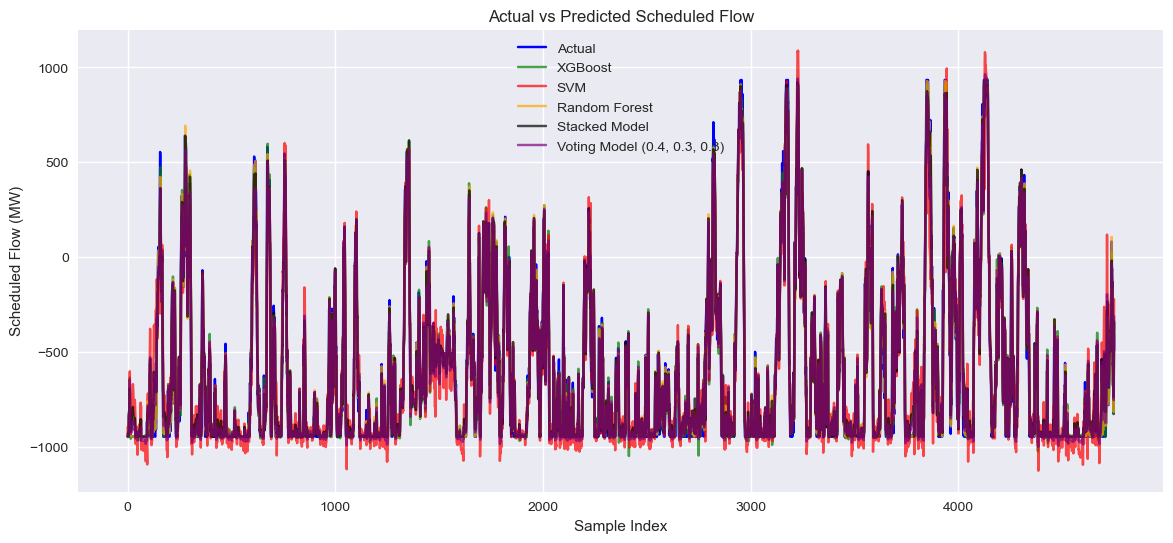

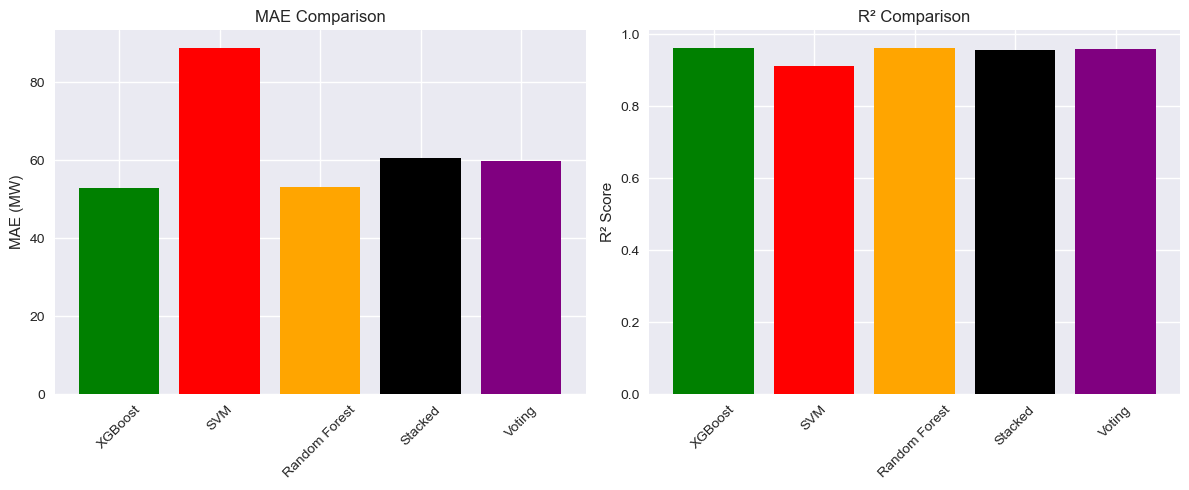

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression



# Train Base Models 

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train_scaled.ravel())
xgb_pred_train = xgb_model.predict(X_train_scaled)  
xgb_pred_val = xgb_model.predict(X_val_scaled)      # Validation predictions
xgb_pred_test = xgb_model.predict(X_test_scaled)    # Test predictions

# SVM (SVR)
svm_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svm_model.fit(X_train_scaled, y_train_scaled.ravel())
svm_pred_train = svm_model.predict(X_train_scaled)  
svm_pred_val = svm_model.predict(X_val_scaled)      # Validation predictions
svm_pred_test = svm_model.predict(X_test_scaled)    # Test predictions

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train_scaled.ravel())
rf_pred_train = rf_model.predict(X_train_scaled)    
rf_pred_val = rf_model.predict(X_val_scaled)        # Validation predictions
rf_pred_test = rf_model.predict(X_test_scaled)      # Test predictions

# Stacking Model
# Stack base model predictions as features for the meta-model
train_stack = np.column_stack((xgb_pred_train, svm_pred_train, rf_pred_train))
val_stack = np.column_stack((xgb_pred_val, svm_pred_val, rf_pred_val))
test_stack = np.column_stack((xgb_pred_test, svm_pred_test, rf_pred_test))

# Train meta-model (XGBoost) for stacking
meta_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
meta_model.fit(train_stack, y_train_scaled.ravel())
stacked_pred_scaled = meta_model.predict(test_stack)
stacked_pred = scaler_y.inverse_transform(stacked_pred_scaled.reshape(-1, 1))

# Voting Model with Specified Weights ---
# Define Voting Regressor with weights: XGBoost=0.4, SVM=0.3, RF=0.3
voting_model = VotingRegressor(estimators=[
    ('xgb', xgb_model),
    ('svm', svm_model),
    ('rf', rf_model)
], weights=[0.4, 0.3, 0.3])  # Weights sum to 1
voting_model.fit(X_train_scaled, y_train_scaled.ravel())  # Train voting model
voting_pred_scaled = voting_model.predict(X_test_scaled)  # Predict on test set
voting_pred = scaler_y.inverse_transform(voting_pred_scaled.reshape(-1, 1))  # Convert back to original scale

# Evaluate All Models 
# Calculate metrics for individual models
mae_xgb = mean_absolute_error(y_test, scaler_y.inverse_transform(xgb_pred_test.reshape(-1, 1)))
r2_xgb = r2_score(y_test, scaler_y.inverse_transform(xgb_pred_test.reshape(-1, 1)))
mae_svm = mean_absolute_error(y_test, scaler_y.inverse_transform(svm_pred_test.reshape(-1, 1)))
r2_svm = r2_score(y_test, scaler_y.inverse_transform(svm_pred_test.reshape(-1, 1)))
mae_rf = mean_absolute_error(y_test, scaler_y.inverse_transform(rf_pred_test.reshape(-1, 1)))
r2_rf = r2_score(y_test, scaler_y.inverse_transform(rf_pred_test.reshape(-1, 1)))

# Calculate metrics for stacked and voting models
mae_stacked = mean_absolute_error(y_test, stacked_pred)
r2_stacked = r2_score(y_test, stacked_pred)
mae_voting = mean_absolute_error(y_test, voting_pred)
r2_voting = r2_score(y_test, voting_pred)

# Print results
print(f"XGBoost - MAE: {mae_xgb:.2f}, R²: {r2_xgb:.2f}")
print(f"SVM - MAE: {mae_svm:.2f}, R²: {r2_svm:.2f}")
print(f"Random Forest - MAE: {mae_rf:.2f}, R²: {r2_rf:.2f}")
print(f"Stacked Model - MAE: {mae_stacked:.2f}, R²: {r2_stacked:.2f}")
print(f"Voting Model (Weights: 0.4, 0.3, 0.3) - MAE: {mae_voting:.2f}, R²: {r2_voting:.2f}")

# Visualization

# Plot 1: Actual vs Predicted
plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(scaler_y.inverse_transform(xgb_pred_test.reshape(-1, 1)), label='XGBoost', color='green', alpha=0.7)
plt.plot(scaler_y.inverse_transform(svm_pred_test.reshape(-1, 1)), label='SVM', color='red', alpha=0.7)
plt.plot(scaler_y.inverse_transform(rf_pred_test.reshape(-1, 1)), label='Random Forest', color='orange', alpha=0.7)
plt.plot(stacked_pred, label='Stacked Model', color='black', alpha=0.7)
plt.plot(voting_pred, label='Voting Model (0.4, 0.3, 0.3)', color='purple', alpha=0.7)
plt.title('Actual vs Predicted Scheduled Flow')
plt.xlabel('Sample Index')
plt.ylabel('Scheduled Flow (MW)')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Bar Chart for MAE and R²
models = ['XGBoost', 'SVM', 'Random Forest', 'Stacked', 'Voting']
mae_values = [mae_xgb, mae_svm, mae_rf, mae_stacked, mae_voting]
r2_values = [r2_xgb, r2_svm, r2_rf, r2_stacked, r2_voting]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(models, mae_values, color=['green', 'red', 'orange', 'black', 'purple'])
plt.title('MAE Comparison')
plt.ylabel('MAE (MW)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['green', 'red', 'orange', 'black', 'purple'])
plt.title('R² Comparison')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature Importance (XGBoost):


Feature Importance:
                    Feature  Importance
7                 flow_lag1    0.960747
0                price_diff    0.008919
5           price_diff_lag1    0.006350
8                 flow_lag3    0.004675
1                      hour    0.004096
11          price_diff_hour    0.003986
6           price_diff_lag2    0.003453
2               day_of_week    0.002423
4                     month    0.002125
10            flow_trend_7d    0.001812
9   price_diff_roll_mean_7d    0.001413
3                is_weekend    0.000000


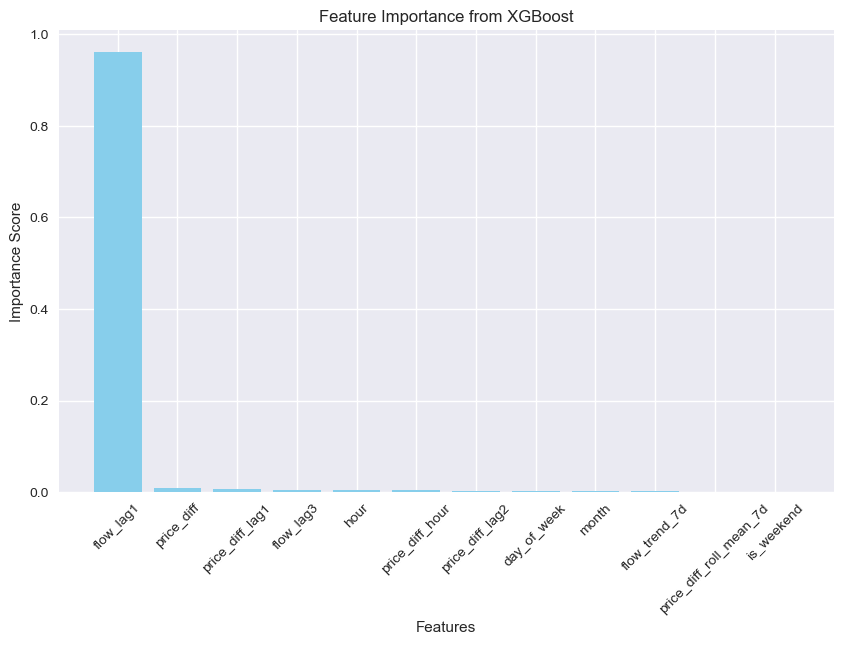


Top 4 Features Selected: ['flow_lag1', 'price_diff', 'price_diff_lag1', 'flow_lag3']

XGBoost with Top 4 Features - MAE: 49.73, R²: 0.96

Comparison:
XGBoost (All Features) - MAE: 49.50, R²: 0.96
XGBoost (Top 4 Features) - MAE: 49.73, R²: 0.96


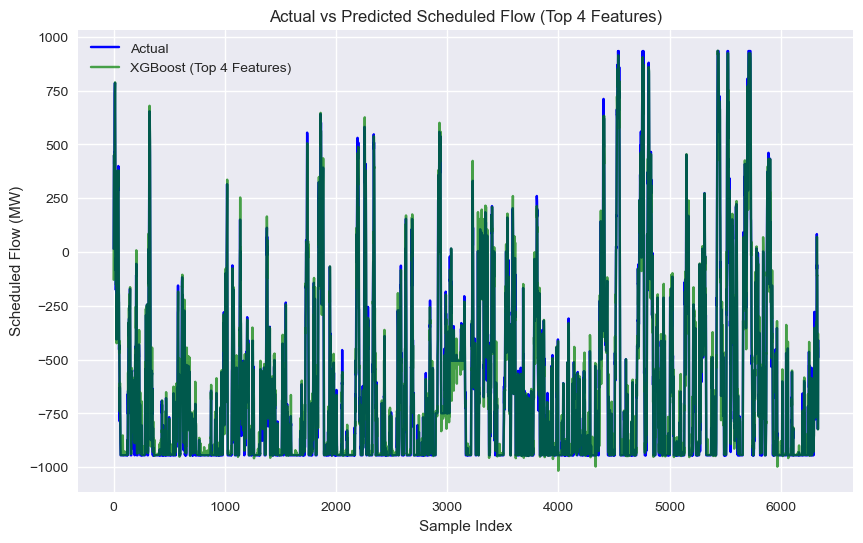

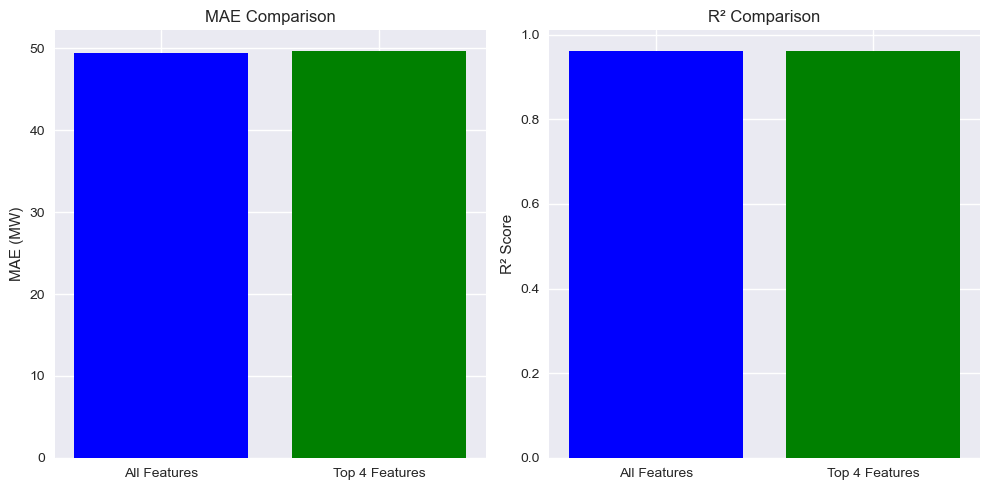

In [ ]:
# Split Data into Train and Test Sets 
train_size = int(0.8 * len(X))  # 80% train, 20% test
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Standardize data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

# Train XGBoost and Calculate Feature Importance ---
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train_scaled.ravel())

# Get feature importance
feature_importance = xgb_model.feature_importances_
feature_names = features

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importance:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance from XGBoost')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.show()

# Select Top 4 Features and Retrain Model 
top_4_features = importance_df['Feature'].head(4).tolist()  # Select top 4 features
print("\nTop 4 Features Selected:", top_4_features)

# Prepare data with only top 4 features
X_top4 = data[top_4_features].values
X_train_top4 = X_top4[:train_size]
X_test_top4 = X_top4[train_size:]

# Standardize the new feature set
X_train_top4_scaled = scaler_X.fit_transform(X_train_top4)
X_test_top4_scaled = scaler_X.transform(X_test_top4)

# Train XGBoost with top 4 features
xgb_model_top4 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model_top4.fit(X_train_top4_scaled, y_train_scaled.ravel())
y_pred_top4_scaled = xgb_model_top4.predict(X_test_top4_scaled)
y_pred_top4 = scaler_y.inverse_transform(y_pred_top4_scaled.reshape(-1, 1))

# Evaluate Model with Top 4 Features 
mae_top4 = mean_absolute_error(y_test, y_pred_top4)
r2_top4 = r2_score(y_test, y_pred_top4)

# Print evaluation results
print("\nXGBoost with Top 4 Features - MAE: {:.2f}, R²: {:.2f}".format(mae_top4, r2_top4))

# Compare with original model (all features)
xgb_model_all = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model_all.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_all_scaled = xgb_model_all.predict(X_test_scaled)
y_pred_all = scaler_y.inverse_transform(y_pred_all_scaled.reshape(-1, 1))

mae_all = mean_absolute_error(y_test, y_pred_all)
r2_all = r2_score(y_test, y_pred_all)

# Print comparison
print("\nComparison:")
print("XGBoost (All Features) - MAE: {:.2f}, R²: {:.2f}".format(mae_all, r2_all))
print("XGBoost (Top 4 Features) - MAE: {:.2f}, R²: {:.2f}".format(mae_top4, r2_top4))

# Visualization
# Plot actual vs predicted with top 4 features
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred_top4, label='XGBoost (Top 4 Features)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Scheduled Flow (Top 4 Features)')
plt.xlabel('Sample Index')
plt.ylabel('Scheduled Flow (MW)')
plt.legend()
plt.grid(True)
plt.show()

# Bar chart for MAE and R² comparison
models = ['All Features', 'Top 4 Features']
mae_values = [mae_all, mae_top4]
r2_values = [r2_all, r2_top4]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, mae_values, color=['blue', 'green'])
plt.title('MAE Comparison')
plt.ylabel('MAE (MW)')

plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['blue', 'green'])
plt.title('R² Comparison')
plt.ylabel('R² Score')
plt.tight_layout()
plt.show()

# Feature Importance (Random Forest):


Feature Importance (Random Forest):
                    Feature  Importance
7                 flow_lag1    0.975122
0                price_diff    0.008046
5           price_diff_lag1    0.004172
8                 flow_lag3    0.003631
6           price_diff_lag2    0.002395
11          price_diff_hour    0.001894
10            flow_trend_7d    0.001231
1                      hour    0.001215
9   price_diff_roll_mean_7d    0.001016
4                     month    0.000713
2               day_of_week    0.000506
3                is_weekend    0.000060


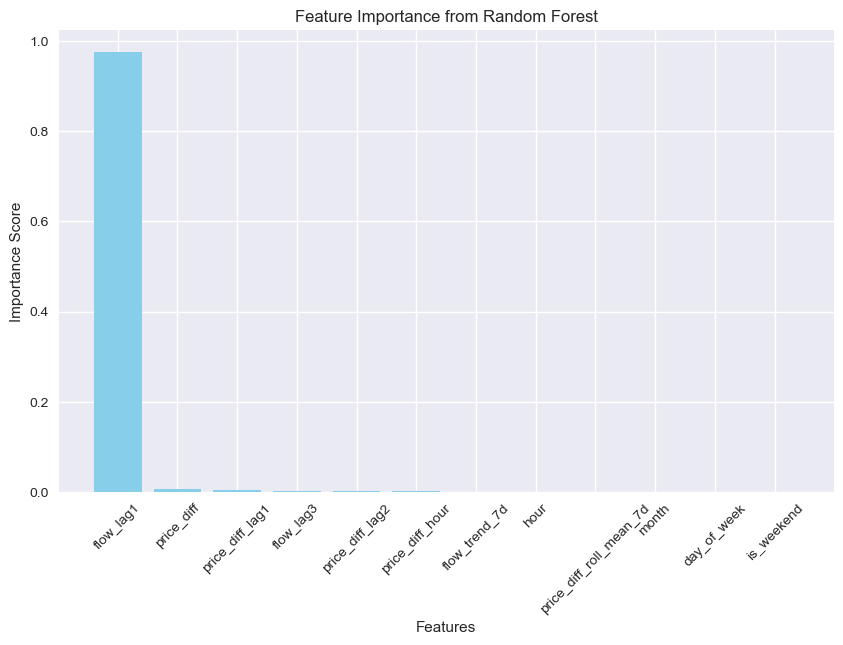


Top 4 Features Selected: ['flow_lag1', 'price_diff', 'price_diff_lag1', 'flow_lag3']

Random Forest with Top 4 Features - MAE: 49.87, R²: 0.96

Comparison:
Random Forest (All Features) - MAE: 49.88, R²: 0.96
Random Forest (Top 4 Features) - MAE: 49.87, R²: 0.96


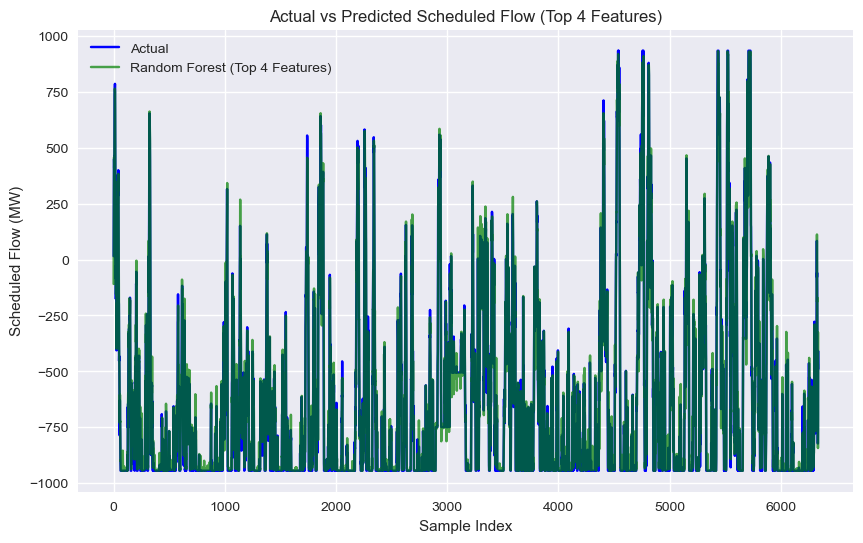

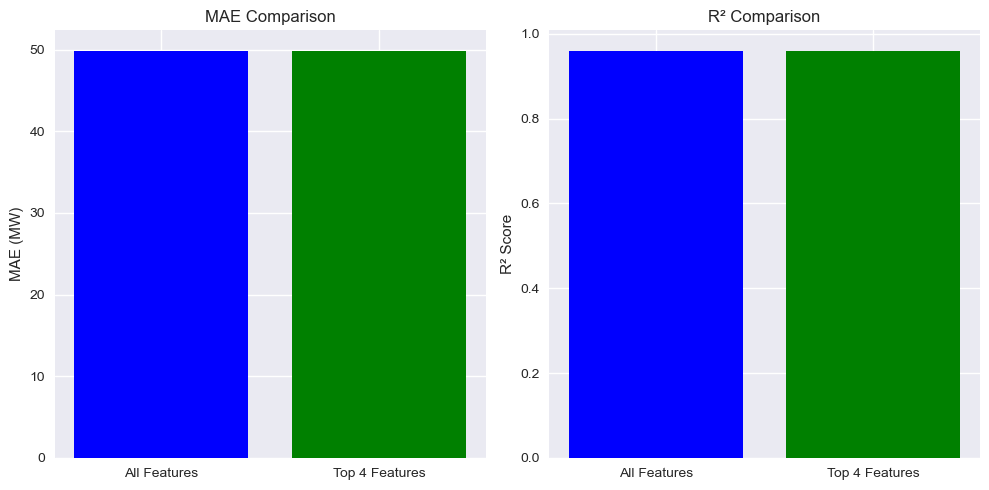

In [15]:
# Split Data into Train and Test Sets 
train_size = int(0.8 * len(X))
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Standardize data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

# Train Random Forest and Calculate Feature Importance 
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train_scaled.ravel())

# Get feature importance
feature_importance = rf_model.feature_importances_
feature_names = features

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importance (Random Forest):")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.show()

# Select Top 4 Features and Retrain Model 
top_4_features = importance_df['Feature'].head(4).tolist()
print("\nTop 4 Features Selected:", top_4_features)

# Prepare data with only top 4 features
X_top4 = data[top_4_features].values
X_train_top4 = X_top4[:train_size]
X_test_top4 = X_top4[train_size:]

# Standardize the new feature set
X_train_top4_scaled = scaler_X.fit_transform(X_train_top4)
X_test_top4_scaled = scaler_X.transform(X_test_top4)

# Train Random Forest with top 4 features
rf_model_top4 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model_top4.fit(X_train_top4_scaled, y_train_scaled.ravel())
y_pred_top4_scaled = rf_model_top4.predict(X_test_top4_scaled)
y_pred_top4 = scaler_y.inverse_transform(y_pred_top4_scaled.reshape(-1, 1))

# Evaluate Model with Top 4 Features
mae_top4 = mean_absolute_error(y_test, y_pred_top4)
r2_top4 = r2_score(y_test, y_pred_top4)

# Print evaluation results
print("\nRandom Forest with Top 4 Features - MAE: {:.2f}, R²: {:.2f}".format(mae_top4, r2_top4))

# Compare with original model (all features)
rf_model_all = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model_all.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_all_scaled = rf_model_all.predict(X_test_scaled)
y_pred_all = scaler_y.inverse_transform(y_pred_all_scaled.reshape(-1, 1))

mae_all = mean_absolute_error(y_test, y_pred_all)
r2_all = r2_score(y_test, y_pred_all)

print("\nComparison:")
print("Random Forest (All Features) - MAE: {:.2f}, R²: {:.2f}".format(mae_all, r2_all))
print("Random Forest (Top 4 Features) - MAE: {:.2f}, R²: {:.2f}".format(mae_top4, r2_top4))

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred_top4, label='Random Forest (Top 4 Features)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Scheduled Flow (Top 4 Features)')
plt.xlabel('Sample Index')
plt.ylabel('Scheduled Flow (MW)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(['All Features', 'Top 4 Features'], [mae_all, mae_top4], color=['blue', 'green'])
plt.title('MAE Comparison')
plt.ylabel('MAE (MW)')

plt.subplot(1, 2, 2)
plt.bar(['All Features', 'Top 4 Features'], [r2_all, r2_top4], color=['blue', 'green'])
plt.title('R² Comparison')
plt.ylabel('R² Score')
plt.tight_layout()
plt.show()

# Feature Importance (SHAP):


Feature Importance (SHAP):
                    Feature  Importance
7                 flow_lag1    0.787913
0                price_diff    0.093858
5           price_diff_lag1    0.040753
1                      hour    0.021475
8                 flow_lag3    0.021245
6           price_diff_lag2    0.010944
10            flow_trend_7d    0.010514
11          price_diff_hour    0.007481
4                     month    0.004847
9   price_diff_roll_mean_7d    0.004204
2               day_of_week    0.002906
3                is_weekend    0.000000


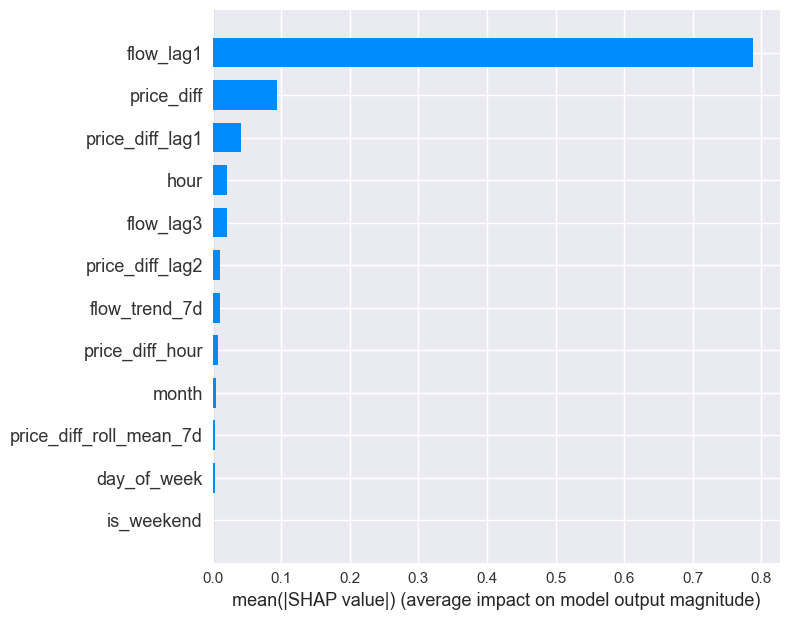


Top 4 Features Selected: ['flow_lag1', 'price_diff', 'price_diff_lag1', 'hour']

XGBoost with Top 4 Features - MAE: 50.26, R²: 0.96

Comparison:
XGBoost (All Features) - MAE: 49.50, R²: 0.96
XGBoost (Top 4 Features) - MAE: 50.26, R²: 0.96


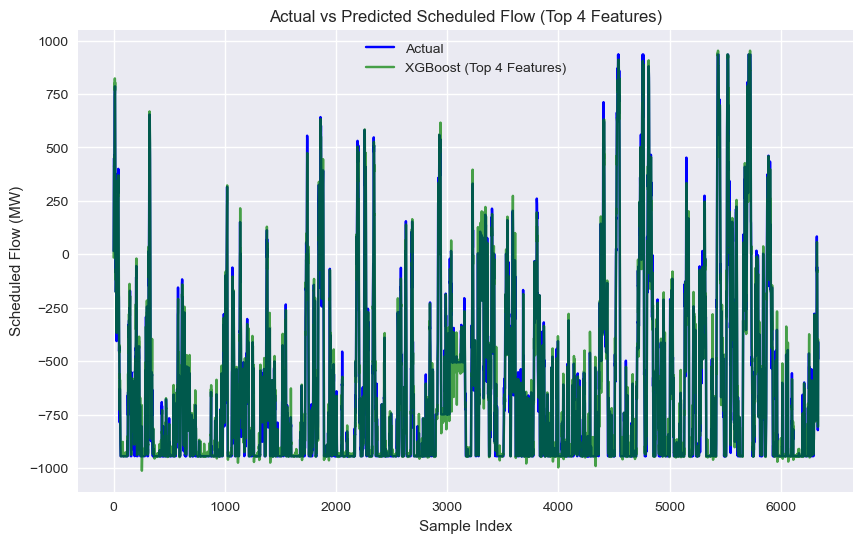

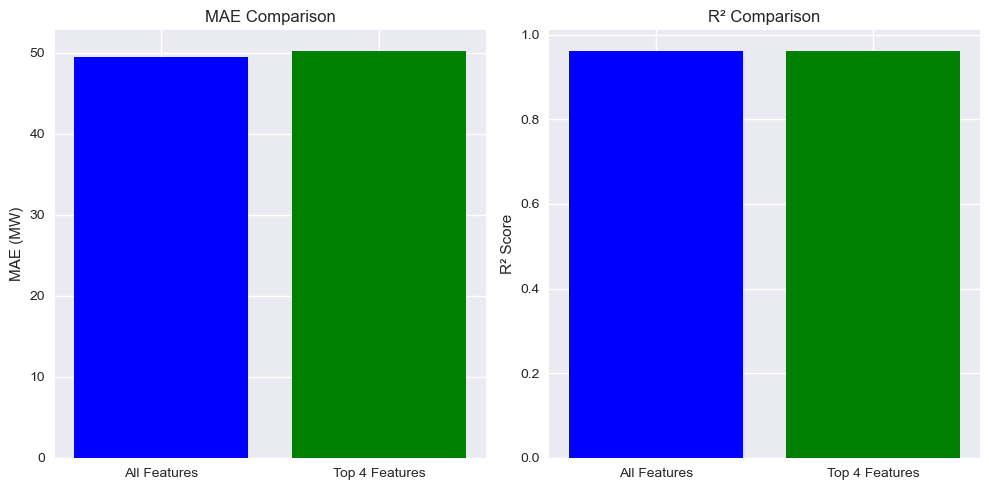

In [17]:
import shap


#  Split Data into Train and Test Sets 
train_size = int(0.8 * len(X))
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Standardize data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

# Train XGBoost and Calculate SHAP Values
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train_scaled.ravel())

# Compute SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train_scaled)

# Calculate mean absolute SHAP values for feature importance
shap_importance = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame({'Feature': features, 'Importance': shap_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importance (SHAP):")
print(importance_df)

# Plot SHAP summary
shap.summary_plot(shap_values, X_train_scaled, feature_names=features, plot_type="bar")

# Select Top 4 Features and Retrain Model
top_4_features = importance_df['Feature'].head(4).tolist()
print("\nTop 4 Features Selected:", top_4_features)

# Prepare data with only top 4 features
X_top4 = data[top_4_features].values
X_train_top4 = X_top4[:train_size]
X_test_top4 = X_top4[train_size:]

# Standardize the new feature set
X_train_top4_scaled = scaler_X.fit_transform(X_train_top4)
X_test_top4_scaled = scaler_X.transform(X_test_top4)

# Train XGBoost with top 4 features
xgb_model_top4 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model_top4.fit(X_train_top4_scaled, y_train_scaled.ravel())
y_pred_top4_scaled = xgb_model_top4.predict(X_test_top4_scaled)
y_pred_top4 = scaler_y.inverse_transform(y_pred_top4_scaled.reshape(-1, 1))

# --- 5. Evaluate Model with Top 4 Features ---
mae_top4 = mean_absolute_error(y_test, y_pred_top4)
r2_top4 = r2_score(y_test, y_pred_top4)

# Print evaluation results
print("\nXGBoost with Top 4 Features - MAE: {:.2f}, R²: {:.2f}".format(mae_top4, r2_top4))

# Compare with original model (all features)
xgb_model_all = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model_all.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_all_scaled = xgb_model_all.predict(X_test_scaled)
y_pred_all = scaler_y.inverse_transform(y_pred_all_scaled.reshape(-1, 1))

mae_all = mean_absolute_error(y_test, y_pred_all)
r2_all = r2_score(y_test, y_pred_all)

print("\nComparison:")
print("XGBoost (All Features) - MAE: {:.2f}, R²: {:.2f}".format(mae_all, r2_all))
print("XGBoost (Top 4 Features) - MAE: {:.2f}, R²: {:.2f}".format(mae_top4, r2_top4))

# --- 6. Visualization ---
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred_top4, label='XGBoost (Top 4 Features)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Scheduled Flow (Top 4 Features)')
plt.xlabel('Sample Index')
plt.ylabel('Scheduled Flow (MW)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(['All Features', 'Top 4 Features'], [mae_all, mae_top4], color=['blue', 'green'])
plt.title('MAE Comparison')
plt.ylabel('MAE (MW)')

plt.subplot(1, 2, 2)
plt.bar(['All Features', 'Top 4 Features'], [r2_all, r2_top4], color=['blue', 'green'])
plt.title('R² Comparison')
plt.ylabel('R² Score')
plt.tight_layout()
plt.show()